In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.3)
import numpy as np
import PhaseRetrieval
import phase_mixing_utils
from skimage import color
from skimage.feature import register_translation
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


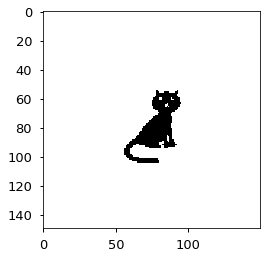

In [2]:
cat = plt.imread("cat1.png")
cat = np.abs(color.rgb2gray(cat)[50:200, 50:200] - 1)
cat = (cat - cat.min()) / (cat.max() - cat.min())
mags = np.abs(np.fft.fftn(cat))
random = np.random.rand(*cat.shape)
plt.imshow(cat, cmap="gray_r")

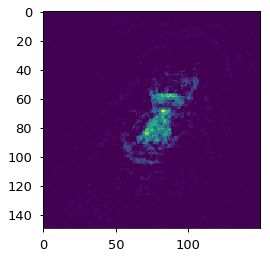

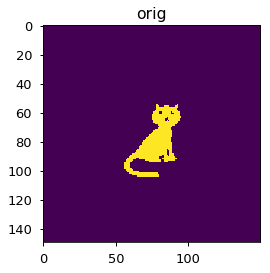

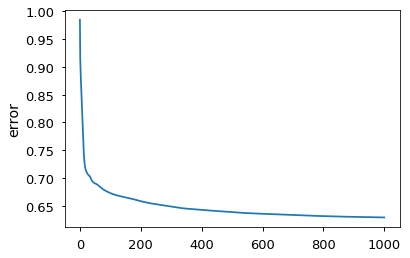

In [3]:
# Error-Reduction
er = PhaseRetrieval.PhaseRetrieval(mags, real_space_guess=random)
er.ErrorReduction(n_iter=1000)
er.calc_real_space_error(cat)

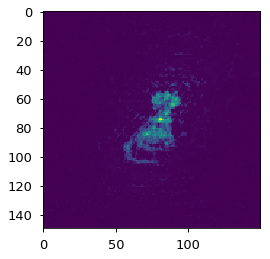

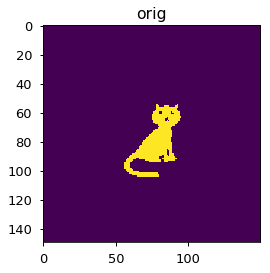

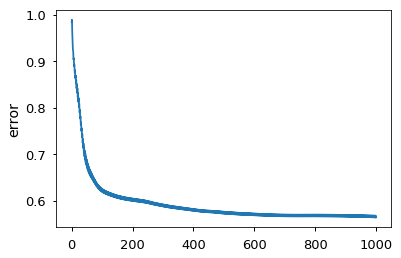

In [4]:
# Input-Output
io = PhaseRetrieval.PhaseRetrieval(mags, real_space_guess=random)
io.InputOutput(n_iter=1000)
io.calc_real_space_error(cat)

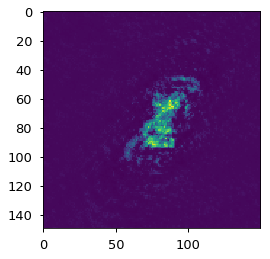

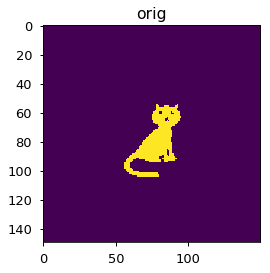

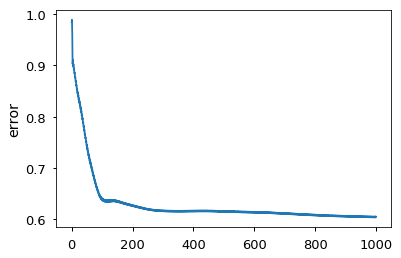

In [5]:
# Hybrid Input-Output
hio = PhaseRetrieval.PhaseRetrieval(mags, real_space_guess=random)
hio.HIO(n_iter=1000)
hio.calc_real_space_error(cat)

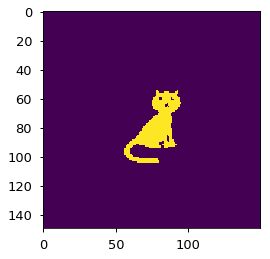

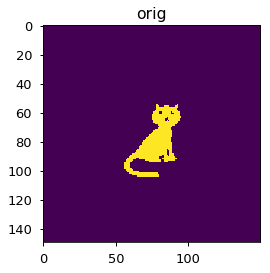

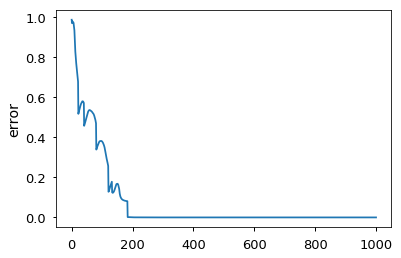

In [6]:
# Continuous Hybrid Input-Output
chio = PhaseRetrieval.PhaseRetrieval(mags, real_space_guess=random)
chio.CHIO(freq=0.95, n_iter=1000)
chio.calc_real_space_error(cat)

In [30]:
def align(img, ref):
    errs = np.zeros(4)
    for i in range(4):
        shift, errs[i], blarg = register_translation(ref, np.rot90(img, k=i))
    n_rot = np.argmin(errs)
    shift, error, blargh= register_translation(ref,np.rot90(img, k=n_rot))
    fixed = np.roll(np.rot90(img, k=n_rot),shift.astype(np.int),axis=(0,1))
    return fixed

In [32]:
try:
    os.mkdir("movie")
except:
    print "Already made"
    
for i in range(251):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].set_title("Error-Reduction")
    ax[0][0].imshow(align(er.rs_track[i], cat), cmap="gray_r")
    ax[0][1].set_title("Input-Output")
    ax[0][1].imshow(align(io.rs_track[i], cat), cmap="gray_r")
    ax[1][0].set_title("HIO")
    ax[1][0].imshow(align(hio.rs_track[i], cat), cmap="gray_r")
    ax[1][1].set_title("CHIO")
    ax[1][1].imshow(align(chio.rs_track[i], cat), cmap="gray_r")
    fig.suptitle("Iteration: %d" %i)
    plt.savefig("movie/img%04d.png" %i)
    plt.close()

Already made


In [35]:
%%bash
ffmpeg -i movie/img%04d.png -vcodec libx264 -pix_fmt yuv420p movie_methodComp.mp4

ffmpeg version 3.4.1 Copyright (c) 2000-2017 the FFmpeg developers
  built with Apple LLVM version 9.0.0 (clang-900.0.39.2)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.4.1 --enable-shared --enable-pthreads --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-gpl --enable-libmp3lame --enable-libx264 --enable-libxvid --enable-opencl --enable-videotoolbox --disable-lzma
  libavutil      55. 78.100 / 55. 78.100
  libavcodec     57.107.100 / 57.107.100
  libavformat    57. 83.100 / 57. 83.100
  libavdevice    57. 10.100 / 57. 10.100
  libavfilter     6.107.100 /  6.107.100
  libavresample   3.  7.  0 /  3.  7.  0
  libswscale      4.  8.100 /  4.  8.100
  libswresample   2.  9.100 /  2.  9.100
  libpostproc    54.  7.100 / 54.  7.100
Input #0, image2, from 'movie/img%04d.png':
  Duration: 00:00:10.04, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 720x720 [SAR 2834:2834 DAR 1:1], 25 fps, 25 tbr, 25 

Text(0.5,0,u'Iteration')

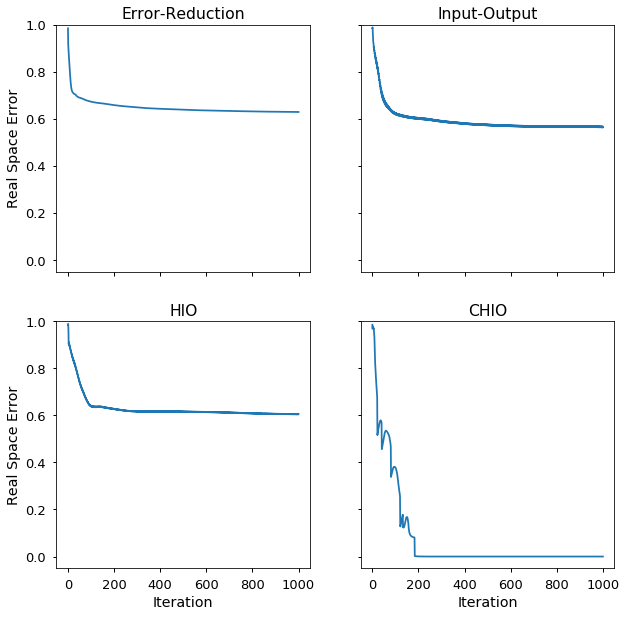

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0][0].set_title("Error-Reduction")
ax[0][0].plot(er.real_space_err_track)
ax[0][0].set_ylim(-.05, 1.0)
ax[0][0].set_ylabel("Real Space Error")

ax[0][1].set_title("Input-Output")
ax[0][1].plot(io.real_space_err_track)
ax[0][1].set_ylim(-.05, 1.0)
                    
ax[1][0].set_title("HIO")
ax[1][0].plot(hio.real_space_err_track)
ax[1][0].set_ylim(-.05, 1.0)
ax[1][0].set_xlabel("Iteration")
ax[1][0].set_ylabel("Real Space Error")

ax[1][1].set_title("CHIO")
ax[1][1].plot(chio.real_space_err_track)
ax[1][1].set_ylim(-.05, 1.0)
ax[1][1].set_xlabel("Iteration")